In [61]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib_venn import venn3, venn3_circles

In [3]:
path=os.chdir("..")                   #Moving back one folder


In [4]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [5]:
final_path= path+"\\Data\\first_analysis.csv" #setting up the final path in final_path

In [7]:
final_path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final\\Data\\first_analysis.csv'

In [9]:
df= pd.read_csv(final_path, encoding='ISO-8859-1')
df.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,net,net_percentage
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


In [10]:
df1=(df.dropna())

df2=df1.copy()

## FInding out the top 10 directors who have managed to get a lot of profit from their movies.

In [107]:
df_director_netp=df2.groupby(['director_name'], as_index=False)['net_percentage'].agg(['mean',len]).reset_index()

In [108]:
df_director_netp.head()

,director_name,mean,len
0,Aaron Schneider,22.354040,1.0
1,Aaron Seltzer,142.732890,1.0
2,Abel Ferrara,-90.181408,1.0
3,Adam Goldberg,-99.843636,1.0
4,Adam Marcus,537.402720,1.0


In [110]:
df_director_netp.describe()

,mean,len
count,1659.000000,1659.000000
mean,930.856029,2.264014
std,19744.237416,2.300202
min,-99.998200,1.000000
25%,-51.471998,1.000000
50%,14.836059,1.000000
75%,129.884743,3.000000
max,719348.553333,25.000000


In [112]:
df_director_netp.sort_values(by='mean', ascending=False).head()

,director_name,mean,len
1170,Oren Peli,719348.553333,1.0
803,Jonathan Caouette,271466.055046,1.0
304,Daniel Myrick,234116.856667,1.0
1590,Travis Cluff,22657.819000,1.0
420,Edward Burns,20528.188843,2.0


#### This analysis does not give clearly idea as in how efficient/profitable a director is as top 4 most profitable directors have only made 1 movie.
#### AND,
#### Mean clearly indicates that most of the directors in the database has number of movies less than 2. 
#### So, considering directors with only 1 movie won't give an exact idea as in how profitable that director is.
#### Hence, we will only consider average net percentage of directors who have made more than 5 movies and ignore the other's.

In [113]:
df_sorting_dir_netp= df_director_netp[df_director_netp['len']>4]

In [114]:
df_sorting_dir_netp=df_sorting_dir_netp.sort_values(by='mean', ascending=False)

In [116]:
df_dir_top_netp= df_sorting_dir_netp.head(10)

In [117]:
df_dir_top_netp

,director_name,mean,len
1549,Tobe Hooper,12488.116922,6.0
739,John Carpenter,3928.914917,13.0
518,George Lucas,3902.030958,5.0
1343,Robert Rodriguez,2308.885054,13.0
638,James Wan,1477.369904,7.0
315,Darren Aronofsky,1035.284582,6.0
653,Jason Reitman,692.202798,6.0
893,Kevin Smith,651.920087,10.0
1300,Richard Linklater,564.542021,11.0
718,Joe Dante,514.106996,6.0


In [36]:
%matplotlib inline

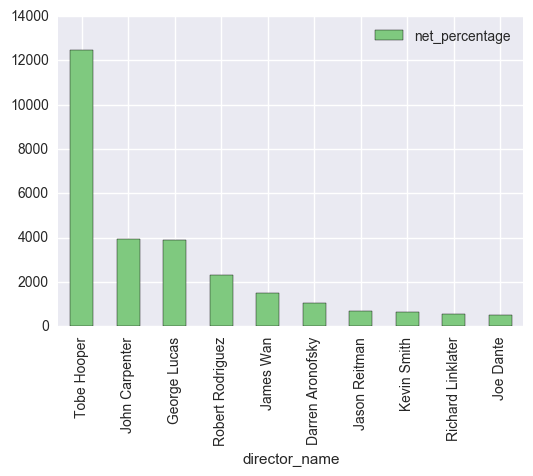

In [37]:
df_dir_top_netp.plot(x='director_name', y='net_percentage', kind='bar', cmap='Accent')

## THe above data frame clearly shows tobe hooper has the highest net profit percentage in terms of directors who have directed atleast 4 movies.

## The most efficient would be JOHN CARPENTER as he has directed 13 movies which is a large number and even then manages to be second on the list of net percentage

## Q. Best director in terms of IMDB Rating

In [118]:
df_director_imdb=df2.groupby(['director_name'], as_index=False)['imdb_score'].agg(['mean',len]).reset_index()

In [120]:
df_sorting_dir_imdb= df_director_imdb.sort_values(by='mean', ascending=False)

In [121]:
df_sorting_dir_imdb= df_sorting_dir_imdb[df_sorting_dir_imdb['len']>4]

In [122]:
df_dir_top_imdb= df_sorting_dir_imdb.head(10)

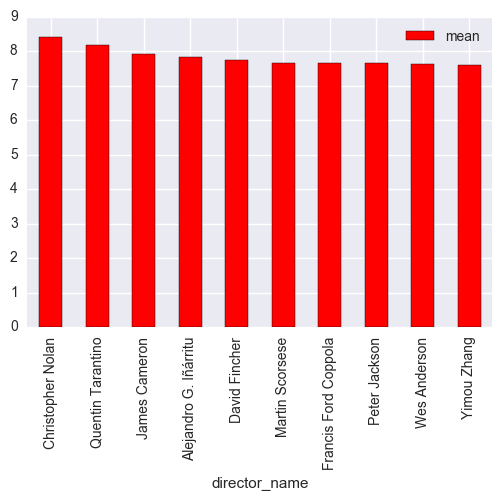

In [124]:
df_dir_top_imdb.plot(x='director_name', y='mean', kind='bar', cmap='rainbow_r')

## Christopher Nolan is the best director when it comes to imdb score.


## Q.Calculating best director on the basis of imdb score, net percentage and facebook popularity.

In [63]:
df_best_dir=df1[['net','director_name']]

In [64]:
df_best_dir=df_best_dir.groupby(['director_name']).mean()

In [65]:
df_best_dir=df_best_dir.sort_values(by='net',ascending=0)[:50]

In [66]:
df_best_dir.index

Index(['Tim Miller', 'George Lucas', 'Richard Marquand', 'Kyle Balda',
       'Colin Trevorrow', 'Chris Buck', 'Joss Whedon', 'Yarrow Cheney',
       'Pierre Coffin', 'Lee Unkrich', 'Roger Allers', 'William Cottrell',
       'James Cameron', 'Peter Faiman', 'Pete Docter', 'Francis Lawrence',
       'Irvin Kershner', 'Daniel Myrick', 'Andrew Adamson', 'Joel Zwick',
       'Sam Taylor-Johnson', 'George Roy Hill', 'Phil Lord', 'Josh Boone',
       'Gary Ross', 'Peter Farrelly', 'Jon Favreau', 'David Silverman',
       'Oren Peli', 'Victor Fleming', 'Penelope Spheeris', 'Robert Wise',
       'Christopher Nolan', 'Leonard Nimoy', 'Steven Spielberg', 'Shane Black',
       'Randal Kleiser', 'Robert Stevenson', 'John Lasseter', 'Michael Sucsy',
       'Rawson Marshall Thurber', 'John G. Avildsen', 'John Cornell',
       'Jay Roach', 'Chris Miller', 'Paul Tibbitt', 'Mike Gabriel',
       'Chris Columbus', 'Todd Phillips', 'Jeannot Szwarc'],
      dtype='object', name='director_name')

In [74]:
df_best_dir1= df1[['director_facebook_likes','director_name']]
df_best_dir1= df_best_dir1.sort_values(by='director_facebook_likes', ascending=0)
df_best_dir1=df_best_dir1.drop_duplicates()[:50]
df_best_dir1=df_best_dir1.set_index('director_name')
df_best_dir1.index

Index(['Joseph Gordon-Levitt', 'Christopher Nolan', 'David Fincher',
       'Denzel Washington', 'Kevin Spacey', 'Martin Scorsese',
       'Clint Eastwood', 'Quentin Tarantino', 'Tom Hanks', 'J.J. Abrams',
       'Steven Spielberg', 'Tim Burton', 'Alfred Hitchcock',
       'Sylvester Stallone', 'Tony Scott', 'Steve Buscemi', 'Leonard Nimoy',
       'Harold Ramis', 'Woody Allen', 'Angelina Jolie Pitt', 'Hayao Miyazaki',
       'Jon Favreau', 'Robert Duvall', 'Lars von Trier', 'Seth MacFarlane',
       'Ron Howard', 'Roman Polanski', 'Bill Duke', 'Michel Gondry',
       'Edgar Wright', 'Shane Black', 'Ethan Coen', 'Baz Luhrmann',
       'Adam Goldberg', 'Bernardo Bertolucci', 'Lena Dunham', 'Tony Goldwyn',
       'Dario Argento', 'Gaspar Noé', 'Giuseppe Tornatore', 'Michael Moore',
       'Jonathan Frakes', 'Matthew Vaughn', 'Uwe Boll', 'Irvin Kershner',
       'Milos Forman', 'Antoine Fuqua', 'Antoine Fuqua', 'Gus Van Sant',
       'Bob Saget'],
      dtype='object', name='director_name

In [75]:
df_best_dir2 = df1[['director_name','imdb_score']]
df_best_dir2 = df_best_dir2.groupby(['director_name']).mean()
df_best_dir2 = df_best_dir2.sort_values(by='imdb_score', ascending=0)[:50]
df_best_dir2.index

Index(['Akira Kurosawa', 'Charles Chaplin', 'Tony Kaye', 'Majid Majidi',
       'Ron Fricke', 'Damien Chazelle', 'Alfred Hitchcock', 'Sergio Leone',
       'Christopher Nolan', 'Asghar Farhadi', 'Richard Marquand', 'Fritz Lang',
       'Lee Unkrich', 'Lenny Abrahamson', 'Billy Wilder', 'Pete Docter',
       'Hayao Miyazaki', 'Quentin Tarantino', 'Joshua Oppenheimer',
       'Juan José Campanella', 'George Roy Hill', 'Elia Kazan',
       'Victor Fleming', 'Milos Forman', 'William Wyler', 'Tim Miller',
       'David Sington', 'Terry George', 'Je-kyu Kang', 'Michael Wadleigh',
       'Stephen Chbosky', 'David Lean', 'Vincent Paronnaud',
       'Michel Hazanavicius', 'Ari Folman', 'Frank Darabont',
       'Denis Villeneuve', 'Joss Whedon', 'James Cameron', 'Jonathan Dayton',
       'George Cukor', 'Tom McCarthy', 'Fabián Bielinsky', 'Dan Gilroy',
       'Cristian Mungiu', 'Stéphane Aubier', 'Don Hall', 'Anna Muylaert',
       'Christophe Barratier', 'Morten Tyldum'],
      dtype='object', 

In [76]:
the_best_dir=df_best_dir.index.intersection(df_best_dir1.index)
the_best_dir= the_best_dir.intersection(df_best_dir2.index)
the_best_dir

Index(['Christopher Nolan'], dtype='object', name='director_name')

In [77]:
set1=set(df_best_dir.index.values)

In [78]:
set2=set(df_best_dir1.index.values)

In [79]:
set3=set(df_best_dir2.index.values)

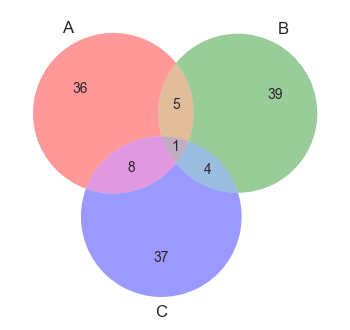

In [80]:
ven=venn3([set1, set2, set3])

## SO THE BEST DIRECTOR IS CHRISTOPHER NOLAN

### Q. FInding out the top  actor based on IMDB Rating

In [126]:
df_actor_imdb=df1.groupby(['actor_1_name'], as_index=False)['imdb_score'].agg(['mean',len]).reset_index()

In [130]:
df_sorting_actor_imdb= df_actor_imdb.sort_values(by='mean', ascending=False)

In [132]:
df_sorting_actor_imdb= df_sorting_actor_imdb[df_sorting_actor_imdb['len']>6]

In [262]:
df_actor_top_imdb= df_sorting_actor_imdb.head(25)

In [263]:
df_actor_top_imdb.head()

,actor_1_name,mean,len
823,Leonardo DiCaprio,7.495238,21.0
271,Clint Eastwood,7.441667,12.0
1339,Tom Hanks,7.425000,24.0
1340,Tom Hardy,7.288889,9.0
21,Alan Rickman,7.287500,8.0


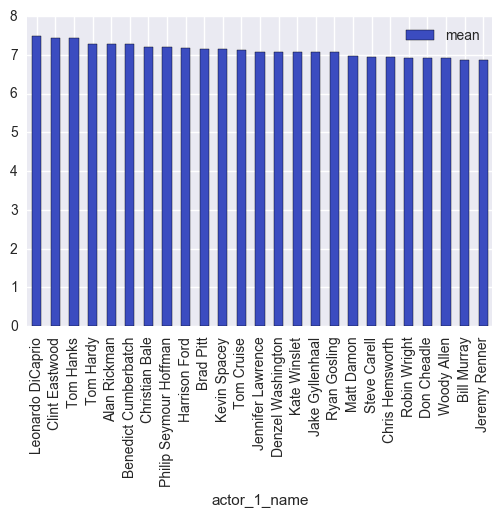

In [264]:
df_actor_top_imdb.plot(x='actor_1_name', y='mean', kind='bar', cmap='coolwarm')

## Leonardo Di caprio is the leading actor as per IMDB rating

,net
actor_1_name,
Wayne Knight,293784000.0
Rupert Everett,286471036.0
Catherine Dyer,226950375.0
Henry Thomas,211314551.0
Kathleen Freeman,207652016.0


In [207]:
df_best_actor=df1[['net','actor_1_name']]
df_best_actor=df_best_actor.groupby(['actor_1_name'])['net'].agg(['mean',len])
df_best_actor=df_best_actor[df_best_actor['len']>6]
df_best_actor.head()

,mean,len
actor_1_name,,
Adam Sandler,1.986211e+07,14.0
Adam Scott,-4.066971e+05,8.0
Al Pacino,1.245669e+07,13.0
Alan Rickman,3.236445e+07,8.0
Alexa PenaVega,-8.617856e+05,7.0


In [253]:
df_best_actor=df_best_actor.sort_values(by='mean',ascending=0)[:25]
df_best_actor.index

Index(['Robert Pattinson', 'Steve Carell', 'Jennifer Lawrence',
       'Harrison Ford', 'Bradley Cooper', 'Chris Hemsworth', 'Tom Hanks',
       'Matthew Broderick', 'Natalie Portman', 'Amy Poehler'],
      dtype='object', name='actor_1_name')

In [254]:
df_best_actor1= df1[['actor_1_facebook_likes','actor_1_name']]
df_best_actor1=df_best_actor1.groupby(['actor_1_name'])['actor_1_facebook_likes'].agg(['sum',len])
df_best_actor1=df_best_actor1[df_best_actor1['len']>6]
df_best_actor1.head()

,sum,len
actor_1_name,,
Adam Sandler,154000.0,14.0
Adam Scott,24000.0,8.0
Al Pacino,182000.0,13.0
Alan Rickman,200000.0,8.0
Alexa PenaVega,14000.0,7.0


In [258]:
df_best_actor1=df_best_actor1.sort_values(by='sum',ascending=0)[:15]
df_best_actor1.index

Index(['Johnny Depp', 'Robin Williams', 'Robert De Niro', 'J.K. Simmons',
       'Jason Statham', 'Leonardo DiCaprio', 'Jimmy Bennett',
       'Robert Downey Jr.', 'Denzel Washington', 'Ryan Gosling',
       'Christian Bale', 'Jennifer Lawrence', 'Keanu Reeves', 'Hugh Jackman',
       'Kevin Spacey'],
      dtype='object', name='actor_1_name')

In [260]:
df_best_actor2 = df1[['actor_1_name','imdb_score']]
df_best_actor2 = df_best_actor2.groupby(['actor_1_name'])['imdb_score'].agg(['mean',len])
df_best_actor2=df_best_actor2[df_best_actor2['len']>6]
df_best_actor2 = df_best_actor2.sort_values(by='mean', ascending=0)[:15]
df_best_actor2.index

Index(['Leonardo DiCaprio', 'Clint Eastwood', 'Tom Hanks', 'Tom Hardy',
       'Alan Rickman', 'Benedict Cumberbatch', 'Christian Bale',
       'Philip Seymour Hoffman', 'Harrison Ford', 'Brad Pitt', 'Kevin Spacey',
       'Tom Cruise', 'Jennifer Lawrence', 'Kate Winslet', 'Denzel Washington'],
      dtype='object', name='actor_1_name')

In [261]:
the_best_actor=df_best_actor.index.intersection(df_best_actor1.index)
the_best_actor= the_best_actor.intersection(df_best_actor2.index)
the_best_actor

Index(['Jennifer Lawrence'], dtype='object', name='actor_1_name')

In [265]:
set4=set(df_best_actor.index.values)

In [266]:
set5= set(df_best_actor1.index.values)

In [267]:
set6= set(df_best_actor2.index.values)

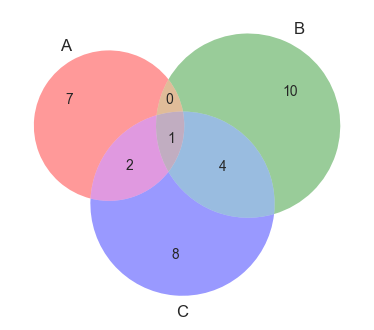

In [268]:
ven1=venn3([set4, set5, set6])

## The best actor when considering imdb, net profit and facebook likes is jennifer lawrence

### Which Country has the highest mean budget

In [348]:
df_budget_country= df2[['country','budget']]

In [349]:
df_budget_country= df_budget_country.groupby(['country'])['budget'].agg(['mean', len]).reset_index()

In [350]:
df_budget_country.head()

,country,mean,len
0,Afghanistan,4.600000e+04,1.0
1,Argentina,1.633333e+06,3.0
2,Aruba,3.500000e+07,1.0
3,Australia,3.785783e+07,39.0
4,Belgium,1.500000e+07,1.0


In [351]:
df_budget_country= df_budget_country[df_budget_country['len']>1]

In [352]:
df_budget_country= df_budget_country.sort_values(by='mean', ascending=False)

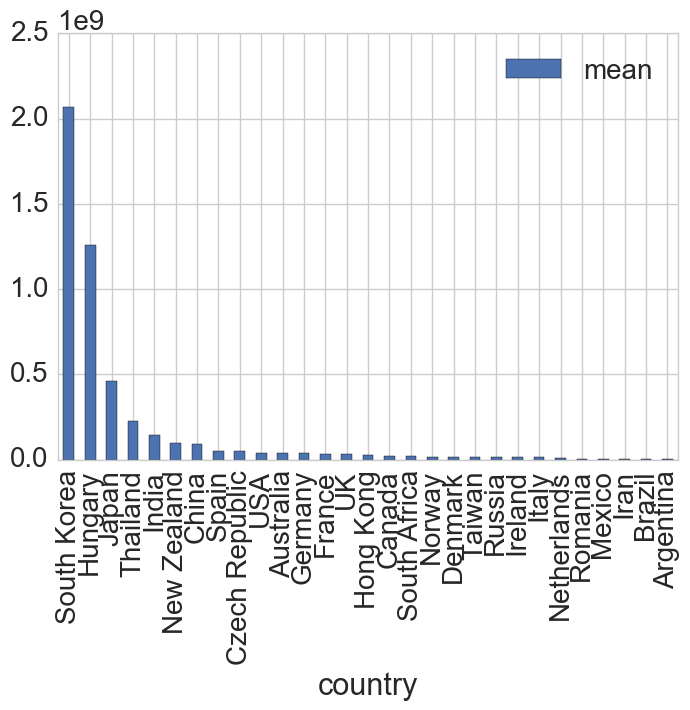

In [353]:
df_budget_country.plot(x='country',y='mean', kind='bar')

### South Korea has the highest Mean budget over the years followed by Hungary, Japan, Thailand and INDIA

### Q. Which country has the highest gross revenue?

In [308]:
df_gross_country= df2[['country','gross']]

In [309]:
df_gross_country= df_gross_country.groupby(['country'])['gross'].agg(['mean', len]).reset_index()

In [310]:
df_gross_country= df_gross_country[df_gross_country['len']>1]

In [333]:
df_gross_country= df_gross_country.sort_values(by='mean', ascending=False)

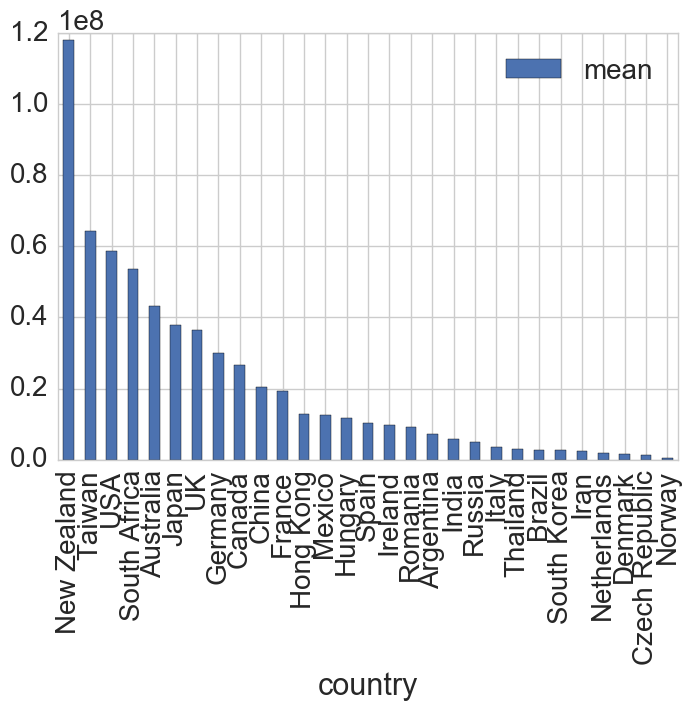

In [334]:
df_gross_country.plot(x='country',y='mean', kind='bar')

###  •	New Zealand tops the average movie revenue (~90 M) and is significantly higher than the second highest Taiwan.

In [403]:
df_country_language1= df_country_language[df_country_language['language']>2]

In [404]:
df_country_language1= df_country_language1.set_index('country')

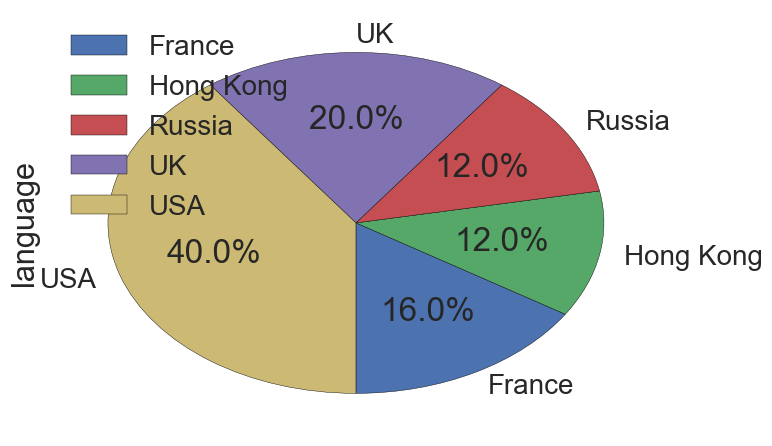

In [407]:
df_country_language1.plot(x='country', y='language', kind='pie',autopct='%1.1f%%', startangle=270)

## USA has the highest number of different language movie releases followed by UK, France Hong Kong and Russia

In [104]:
genres = []
for genre in movie_genres:
    if(len(genre) >= 2):
        for i in genre:
            if i not in genres:
                genres.append(i)
    elif genre not in genres:
        if isinstance(genre,list):
            genres.append(genre[0])
genres = set(genres)

In [107]:
len(genres)

22

In [108]:
genres


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}